In [70]:
import numpy as np

In [71]:
import pandas as pd
from pandas import Series, DataFrame

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
import math
import random

In [74]:
import lshash
from lshash.lshash import LSHash

In [75]:
import sklearn
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.mixture import GaussianMixture

In [76]:
import matplotlib.pyplot as plt

In [77]:
from scipy.interpolate import interp1d

## 1.a 开始（数据处理）

In [78]:
row_data = pd.read_csv('../reco_data/trade.csv')

In [79]:
row_data

,uid,sldat,pno,cno,vipno,id,pluno,bcd,pluname,spec,...,dptno,dptname,bndno,bndname,qty,amt,disamt,ismmx,mtype,mdocno
0,16052118091609506,2016-05-21 18:09:33,16.0,8308.0,1591016439575,2.0,27400855,211211400800000011,菜煎饼,NaN,...,27400,特色熟食,NaN,NaN,0.001,8.00,0.0,0,NaN,NaN
1,16051518411829994,2016-05-15 18:41:04,18.0,8302.0,1591016439575,1.0,27400855,211211400800000011,菜煎饼,NaN,...,27400,特色熟食,NaN,NaN,0.001,8.00,0.0,0,NaN,NaN
2,16051518411829994,2016-05-15 18:41:04,18.0,8302.0,1591016439575,2.0,27400855,211211400800000011,菜煎饼,NaN,...,27400,特色熟食,NaN,NaN,0.001,8.00,0.0,0,NaN,NaN
3,16080317581814582,2016-08-03 17:58:00,18.0,8306.0,1591016439575,4.0,22000049,200310600973008126,片红85富士,NaN,...,22000,本地苹果,NaN,NaN,0.812,9.73,0.0,0,NaN,NaN
4,16052118091609506,2016-05-21 18:09:33,16.0,8308.0,1591016439575,4.0,22000049,200310601174011762,片红85富士,NaN,...,22000,本地苹果,NaN,NaN,1.176,11.74,0.0,0,NaN,NaN
5,16061418281909239,2016-06-14 18:28:21,19.0,8311.0,1591016439575,3.0,22000049,200310601361011360,片红85富士,NaN,...,22000,本地苹果,NaN,NaN,1.136,13.61,0.0,0,NaN,NaN
6,16061418281909239,2016-06-14 18:28:21,19.0,8311.0,1591016439575,5.0,30448023,6928947472633,新鲜生活一次性坐厕纸7263,1*50,...,30448,其他一次性配件,30352.0,新鲜生活,1.000,10.90,0.0,0,NaN,NaN
7,16061418281909239,2016-06-14 18:28:21,19.0,8311.0,1591016439575,11.0,27300273,2248494000000,米粥、豆浆系列,NaN,...,27300,豆制品类,NaN,NaN,4.000,2.00,0.0,0,NaN,NaN
8,16072413521808399,2016-07-24 13:52:53,18.0,8337.0,1591016439575,4.0,27300273,2248494000000,米粥、豆浆系列,NaN,...,27300,豆制品类,NaN,NaN,5.000,2.50,0.0,0,NaN,NaN
9,16072413521808399,2016-07-24 13:52:53,18.0,8337.0,1591016439575,2.0,25120036,2249020000000,王哥庄长馒头,NaN,...,25120,普通馒头,NaN,NaN,4.000,2.80,0.0,0,NaN,NaN


In [80]:
row_data = row_data.sort_values(by = ["vipno", "pluno"])

In [81]:
row_data

,uid,sldat,pno,cno,vipno,id,pluno,bcd,pluname,spec,...,dptno,dptname,bndno,bndname,qty,amt,disamt,ismmx,mtype,mdocno
1364,16072311561807577,2016-07-23 11:56:37,18.0,8338.0,13205496418,6.0,10000006,6933266600025,百事可乐600ml,1*24,...,10000,可乐,10007.0,百事,1.000,2.70,0.0,0,NaN,NaN
1362,16060814461906749,2016-06-08 14:46:05,19.0,8306.0,13205496418,2.0,10110017,6956416200067,美汁源果粒橙420ml,1*24,...,10110,橙汁,10080.0,美汁源,1.000,2.90,0.0,0,NaN,NaN
1363,16072311561807577,2016-07-23 11:56:37,18.0,8338.0,13205496418,3.0,10110017,6956416200067,美汁源果粒橙420ml,1*24,...,10110,橙汁,10080.0,美汁源,1.000,2.90,0.0,0,NaN,NaN
1291,16051216561827784,2016-05-12 16:56:01,18.0,8306.0,13205496418,2.0,10119019,6938166929689,和丝露蓝莓汁828ml,1*6,...,10119,其他果汁饮料,10719.0,和丝露,1.000,12.80,0.0,0,NaN,NaN
1290,16051216561827784,2016-05-12 16:56:01,18.0,8306.0,13205496418,3.0,10119020,6938166929320,和丝露芒果汁828ml,1*6,...,10119,其他果汁饮料,10719.0,和丝露,1.000,12.80,0.0,0,NaN,NaN
1367,16072311561807577,2016-07-23 11:56:37,18.0,8338.0,13205496418,5.0,10130001,6921317905168,康师傅绿茶(青岛)550ml,1*15,...,10130,绿茶,10060.0,康师傅,1.000,2.50,0.0,0,NaN,NaN
1260,16070216261519020,2016-07-02 16:26:44,15.0,8331.0,13205496418,17.0,10132002,6921317992069,康师傅茉莉清茶1L,1*8,...,10132,花茶,10060.0,康师傅,1.000,3.90,0.0,0,NaN,NaN
1372,16070216261519020,2016-07-02 16:26:44,15.0,8331.0,13205496418,15.0,10136005,4891599339826,加多宝凉茶六连包,1*4,...,10136,凉茶,10198.0,加多宝,1.000,22.50,0.0,0,NaN,NaN
1334,16070216261519020,2016-07-02 16:26:44,15.0,8331.0,13205496418,23.0,10201002,6945095201342,特种兵生榨椰子汁1.25L,1*6,...,10201,植物蛋白饮料,10637.0,特种兵,1.000,16.80,0.0,0,NaN,NaN
1308,16070216261519020,2016-07-02 16:26:44,15.0,8331.0,13205496418,5.0,10300019,6901035603782,崂山啤酒精品听装500ml,1*12,...,10300,国产黄啤,10068.0,崂山,1.000,4.00,0.0,0,NaN,NaN


In [82]:
vipno_series = row_data.vipno.drop_duplicates()  

In [83]:
vipno_series

1364             13205496418
9345             15954611837
1166             18033305699
8011             18678696982
8145           1590140040664
9184           1590140118226
9420           1590140305015
5993           1590140400093
10645          1590140606433
1698           1590140611314
10858          1590141216914
10621          1590142125499
5790           1590142135214
8609           1590142143233
62             1590142151757
10583          1590142156790
10728          1590142175272
5671           1590142182775
4104           1590142185844
2859           1590142188470
1589           1590142190480
9943           1590142192491
7972           1590142194532
10077          1590142202978
6531           1590142205832
7178           1590142206747
10310          1590142212458
7657           1590142219754
9482           1590142224192
5002           1590142226813
                ...         
7751           2900001564793
619            2900001584470
3224           2900001645768
8540          

In [84]:
pluno_series = row_data.pluno.drop_duplicates()  

In [85]:
pluno_series

1364     10000006
1362     10110017
1291     10119019
1290     10119020
1367     10130001
1260     10132002
1372     10136005
1334     10201002
1308     10300019
1261     10401008
1272     11020014
1418     11220073
1263     11300123
1329     11511084
1307     14020005
1273     14078003
1373     14091006
1267     14091009
1392     14091047
1374     14092013
1376     14092014
1295     14092015
1264     14092017
1311     14092068
1282     14101122
1265     14112003
1278     14121012
1302     14121037
1405     14121047
1368     14402009
           ...   
6124     10119059
6139     11240006
6152     11301053
6158     11303138
6119     11303160
6150     14090021
6209     14092026
6112     14130021
6109     14131005
6115     14141034
6199     14142038
6201     14206004
6212     14275022
6149     14275025
6242     14300099
6229     14596016
6162     14710016
6113     14714010
6111     14812004
6206     15212004
6156     22002006
6207     30320003
6197     30321005
6142     30514009
6135     3

In [86]:
data = DataFrame(0, columns = vipno_series, index = pluno_series)

In [87]:
data

vipno,13205496418,15954611837,18033305699,18678696982,1590140040664,1590140118226,1590140305015,1590140400093,1590140606433,1590140611314,...,2900003109510,2900003113500,2900003114613,2900003115917,2900003116167,2900003119076,2900003122434,6222021615003856212,6222021615006712446,6222021615015662822
pluno,,,,,,,,,,,,,,,,,,,,,
10000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10110017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10119019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10119020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10130001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10132002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10136005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10201002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10300019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
for i in row_data.index:
    vipno = row_data['vipno'][i]
    pluno = row_data['pluno'][i]
    amt = row_data['amt'][i]
    if math.isnan(data[vipno][pluno]):
        data[vipno][pluno] = amt
    else:
        data[vipno][pluno] += amt

In [89]:
data

vipno,13205496418,15954611837,18033305699,18678696982,1590140040664,1590140118226,1590140305015,1590140400093,1590140606433,1590140611314,...,2900003109510,2900003113500,2900003114613,2900003115917,2900003116167,2900003119076,2900003122434,6222021615003856212,6222021615006712446,6222021615015662822
pluno,,,,,,,,,,,,,,,,,,,,,
10000006,2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
10110017,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10119019,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10119020,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10130001,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10132002,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10136005,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10201002,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10300019,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.a 结束（数据处理）

## 1.b 开始（knn）

In [90]:
data.shape

(2635, 298)

In [91]:
pluno_total = data.shape[0]
input_dim = pluno_total 
vipno_total = data.shape[1]

In [92]:
hash_rate_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5];

In [93]:
hash_size_list = list();

In [94]:
for item in hash_rate_list:
    hash_size_list.append(round(vipno_total * item));

In [95]:
hash_size_list

[3, 15, 30, 60, 89, 149]

In [96]:
k_list = [1, 2, 3, 4, 5];

In [97]:
k_list

[1, 2, 3, 4, 5]

In [98]:
# 利用lsh计算周围点到自己的距离
def lsh(hash_size, input_dim, query_point):
    global data;
    lsh = LSHash(hash_size, input_dim);
    for vipno in data:
        lsh.index(list(data[vipno]), extra_data=vipno)
    return lsh.query(query_point)

In [99]:
# 选出离自己最近的k个点
def knn(k, hash_size, input_dim, query_point):
    k_query = lsh(hash_size, input_dim, query_point)[1: k + 1];
    k_vipno = [];
    k_distance = [];
    for item in k_query:
        k_vipno.append(item[0][1]);
        k_distance.append(item[1]);
    knn_df = DataFrame({'vipno':k_vipno, 'distance': k_distance})
    return knn_df

In [100]:
# 选一个vipno对不同的hash_size和k进行计算
def vip_knn(input_dim, vipno):
    print("vipno: ", vipno);
    query_point = data[vipno];
    global hash_size_list;
    global k_list;
    vip_knn_df = DataFrame(columns = k_list, index = hash_size_list);
    for hash_size in hash_size_list:
        for k in k_list:
            knn_df = knn(k, hash_size, input_dim, query_point);
            print("hash_size: ", hash_size);
            print("k: ", k);
            print (knn_df);

In [101]:
ran = random.randrange(0, 298, 1)

In [102]:
ran

108

In [103]:
random_vipno = vipno_series.values[ran]

In [104]:
random_vipno

1591020377344

In [105]:
# 调用
vip_knn(input_dim, random_vipno)

vipno:  1591020377344
hash_size:  3
k:  1
   distance          vipno
0     29610  1590151544861
hash_size:  3
k:  2
   distance          vipno
0     29967  1591150424154
1     30053  1590142175272
hash_size:  3
k:  3
   distance          vipno
0     29610  1590151544861
1     29753  1595132332932
2     29967  1591150424154
hash_size:  3
k:  4
   distance          vipno
0     30090  1590142156790
1     30623  1590142202978
2     30711  2900000224278
3     30840  1591020667889
hash_size:  3
k:  5
   distance          vipno
0     29427  1592140505983
1     29996  1593140148286
2     30312  1590142125499
3     30313  2900001564793
4     30906  1595141299820
hash_size:  15
k:  1
Empty DataFrame
Columns: [distance, vipno]
Index: []
hash_size:  15
k:  2
Empty DataFrame
Columns: [distance, vipno]
Index: []
hash_size:  15
k:  3
Empty DataFrame
Columns: [distance, vipno]
Index: []
hash_size:  15
k:  4
Empty DataFrame
Columns: [distance, vipno]
Index: []
hash_size:  15
k:  5
Empty DataFrame
Colum

## 1.b结束（knn）

## 2.a开始（k-means）

In [106]:
# k-means聚类并计算其silhouette系数
def kmeans(n_clusters):
    X = data.T
    # Incorrect number of clusters
    labels = KMeans(n_clusters = n_clusters).fit_predict(X)
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    return silhouette_score

In [107]:
# 选择不同的k进行k-means聚类并计算其silhouette系数
def vip_kmeans():
    n_clusters_list = pd.Series(range(2, int(math.sqrt(vipno_total / 2) + 40)))
    vip_kmeans_df = pd.DataFrame(columns=['silhouette_score'], index = n_clusters_list)
    for n_clusters in n_clusters_list:
        silhouette_score = kmeans(n_clusters)
        vip_kmeans_df['silhouette_score'][n_clusters] = silhouette_score
    return vip_kmeans_df

In [108]:
vip_kmeans_df = vip_kmeans()

In [109]:
vip_kmeans_df

,silhouette_score
2,0.941759
3,0.864978
4,0.806563
5,0.782527
6,0.735422
7,0.706781
8,0.516167
9,0.110507
10,0.497864
11,0.181882


In [110]:
# 作图
def kmeans_plot(vip_kmeans_df):
    f = interp1d(vip_kmeans_df.index, vip_kmeans_df.silhouette_score)
    xnew = vip_kmeans_df.index.copy()
    plt.plot(vip_kmeans_df.index, vip_kmeans_df.silhouette_score, 'o', xnew, f(xnew), '-')
    plt.xlim([2, int(math.sqrt(vipno_total / 2) + 40)])
    plt.ylim([-0.5, 1])
    plt.legend(['data', 'linear'], loc='best')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on reco data",
        fontsize=14, fontweight='bold')
    plt.show()

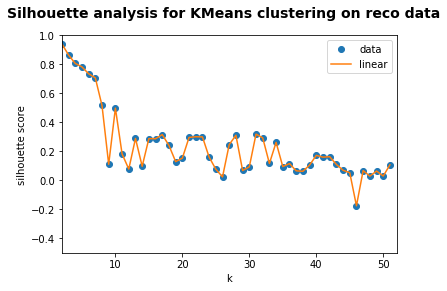

In [111]:
kmeans_plot(vip_kmeans_df)

In [112]:
X = StandardScaler().fit_transform(data.T)
kmeans_labels = KMeans(n_clusters = 4).fit_predict(X)

In [113]:
# 选择聚类效果较好的 k = 2 时，查看聚类结果
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## 2.a 结束

## 3.a 开始

In [114]:
# 判断聚类结果是否分出2类以上
def judge(arr):
    temp = arr[0];
    for i in arr:
        if temp != i:
            return True;
    return False;

In [115]:
# DBSCAN聚类
def dbscan(eps):
    X = StandardScaler().fit_transform(data.T)
    db = DBSCAN(eps = eps).fit(X)
    labels = db.labels_
    if judge(labels):
        silhouette_score = metrics.silhouette_score(X, labels)
        return silhouette_score
    else:
        return -1

In [116]:
# 选择不同的eps聚类并计算其silhouette系数
def vip_dbscan():
    vip_dbscan_df = pd.DataFrame(columns = ['silhouette_score'], index = np.arange(20, 150, 5))
    for eps in np.arange(20, 150, 5):
        silhouette_score = dbscan(eps)
        vip_dbscan_df['silhouette_score'][eps] = silhouette_score
    return vip_dbscan_df

In [117]:
vip_dbscan_df = vip_dbscan()

In [118]:
vip_dbscan_df

,silhouette_score
20,-0.194231
25,-0.10558
30,-0.0265472
35,0.034153
40,0.0870003
45,0.150627
50,0.204767
55,0.245794
60,0.27737
65,0.308034


In [119]:
vip_dbscan_df.index

Int64Index([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
             85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145],
           dtype='int64')

In [120]:
vip_dbscan_df.silhouette_score

20     -0.194231
25      -0.10558
30    -0.0265472
35      0.034153
40     0.0870003
45      0.150627
50      0.204767
55      0.245794
60       0.27737
65      0.308034
70      0.336027
75      0.374431
80      0.406719
85      0.414988
90      0.433585
95      0.440235
100     0.457811
105     0.465831
110     0.488395
115     0.495219
120     0.506584
125     0.524478
130     0.524478
135           -1
140           -1
145           -1
Name: silhouette_score, dtype: object

In [121]:
# 作图
def dbscan_plot(vip_dbscan_df):
    f = interp1d(vip_dbscan_df.index, vip_dbscan_df.silhouette_score)
    xnew = vip_dbscan_df.index.copy()
    plt.plot(vip_dbscan_df.index, vip_dbscan_df.silhouette_score, 'o', xnew, f(xnew), '-')
    plt.ylim([-1, 1])
    plt.legend(['data', 'linear'], loc='best')
    plt.xlabel('eps')
    plt.ylabel('silhouette score')
    plt.suptitle(
        "Silhouette analysis for DBSCAN clustering on reco data",
        fontsize=14, fontweight='bold')
    plt.show()

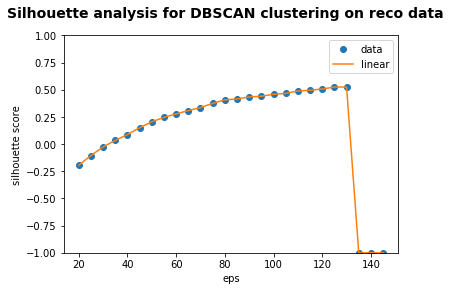

In [122]:
dbscan_plot(vip_dbscan_df)

In [123]:
def detail_vip_dbscan():
    vip_dbscan_df = pd.DataFrame(columns = ['silhouette_score'], index = np.arange(125, 132, 1))
    for eps in np.arange(125, 132, 1):
        silhouette_score = dbscan(eps)
        vip_dbscan_df['silhouette_score'][eps] = silhouette_score
    return vip_dbscan_df

In [124]:
# 在小范围内查看silhouette score以选出最佳的
detail_vip_dbscan_df = detail_vip_dbscan()

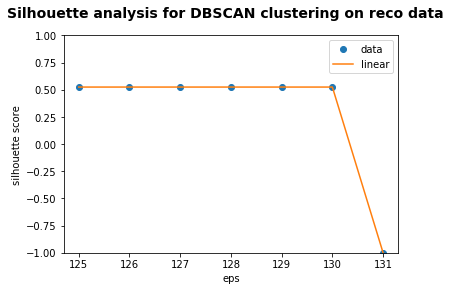

In [125]:
dbscan_plot(detail_vip_dbscan_df)

In [126]:
# 选择聚类效果最好的 eps = 130 时，查看聚类结果
X = StandardScaler().fit_transform(data.T)
db = DBSCAN(130).fit(X)
dbscan_labels = db.labels_

In [127]:
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

## 3.a 结束

## 4.a 开始

In [128]:
# 使用gmm进行聚类
def gmm(n_components):
    X = StandardScaler().fit_transform(data.T)
    gmm = GaussianMixture(n_components = n_components, covariance_type = 'full', max_iter=20, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)
    silhouette_score = metrics.silhouette_score(X, labels)
    return silhouette_score

In [129]:
# 选择不同的n_components聚类并计算其silhouette系数
def vip_gmm():
    vip_gmm_df = pd.DataFrame(columns = ['silhouette_score'], index = np.arange(2, 15))
    for n_components in np.arange(2, 15):
        silhouette_score = gmm(n_components)
        vip_gmm_df['silhouette_score'][n_components] = silhouette_score
    return vip_gmm_df

In [170]:
vip_gmm_df = vip_gmm()

In [171]:
vip_gmm_df

,silhouette_score
2,-0.145406
3,-0.144223
4,-0.141228
5,-0.138283
6,-0.136833
7,-0.134771
8,-0.129873
9,-0.127724
10,-0.126421
11,-0.26715


In [172]:
# 作图
def gmm_plot(vip_gmm_df):
    f = interp1d(vip_gmm_df.index, vip_gmm_df.silhouette_score)
    xnew = vip_gmm_df.index.copy()
    plt.plot(vip_gmm_df.index, vip_gmm_df.silhouette_score, 'o', xnew, f(xnew), '-')
    plt.xlim([2, 15])
    plt.ylim([-0.5, 1])
    plt.legend(['data', 'linear'], loc='best')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.suptitle(
        "Silhouette analysis for GMM clustering on reco data",
        fontsize=14, fontweight='bold')
    plt.show()

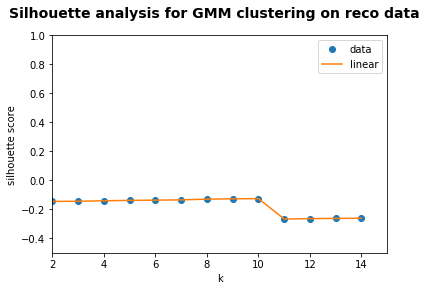

In [173]:
gmm_plot(vip_gmm_df)

## 4.a 假定以Kmeans作为真实的聚类结果，计算GMM的准确率(accuracy)

In [174]:
def gmm_kmeans(n_clusters):
    X = StandardScaler().fit_transform(data.T)
    kmeans_labels = KMeans(n_clusters = n_clusters).fit_predict(X)
    gmm = GaussianMixture(n_components = n_clusters, covariance_type = 'full', max_iter=20, random_state=0)
    gmm.fit(X)
    gmm_labels = gmm.predict(X)  
    print(kmeans_labels)
    print(gmm_labels)
    cnt = 0
    for i, gmm_label in enumerate(gmm_labels):
        if gmm_label != kmeans_labels[i]:
            cnt += 1
    print("The accuracy for KMeans = ", cnt / float(len(gmm_labels)))

In [175]:
gmm_kmeans(2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 

## 4.b 假定以DBScan作为真实的聚类结果，计算GMM的准确率(accuracy)

In [176]:
def dbscan_kmeans(n_clusters):
    X = StandardScaler().fit_transform(data.T)
    db = DBSCAN(eps = 130).fit(X)
    dbscan_labels = db.labels_
    gmm = GaussianMixture(n_components = n_clusters, covariance_type = 'full', max_iter=20, random_state=0)
    gmm.fit(X)
    gmm_labels = gmm.predict(X)  
    print(dbscan_labels)
    print(gmm_labels)
    cnt = 0
    for i, gmm_label in enumerate(gmm_labels):
        if gmm_label != dbscan_labels[i]:
            cnt += 1
    print("The accuracy for KMeans = ", cnt / float(len(gmm_labels)))

In [69]:
dbscan_kmeans(10)

NameError: name 'dbscan_kmeans' is not defined